In [1]:
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

In [2]:
df=pd.read_csv('Trading_revenue.csv')

In [3]:
df

,YearOpened,Revenue,BusinessType
0,1970,405987.0072,BM
1,1971,293321.6385,BS
2,1972,63808.2443,OS
3,1972,217429.5834,BS
4,1973,75351.4881,BM
...,...,...,...
60,1998,429926.8412,OS
61,1999,202659.9314,BM
62,1999,517716.3615,OS
63,2000,539309.2856,BM


In [4]:
df.dtypes

YearOpened        int64
Revenue         float64
BusinessType     object
dtype: object

In [5]:
df['Duration']=2014-df['YearOpened']
df

,YearOpened,Revenue,BusinessType,Duration
0,1970,405987.0072,BM,44
1,1971,293321.6385,BS,43
2,1972,63808.2443,OS,42
3,1972,217429.5834,BS,42
4,1973,75351.4881,BM,41
...,...,...,...,...
60,1998,429926.8412,OS,16
61,1999,202659.9314,BM,15
62,1999,517716.3615,OS,15
63,2000,539309.2856,BM,14


C:\Users\rajav\amutha\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rajav\amutha\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


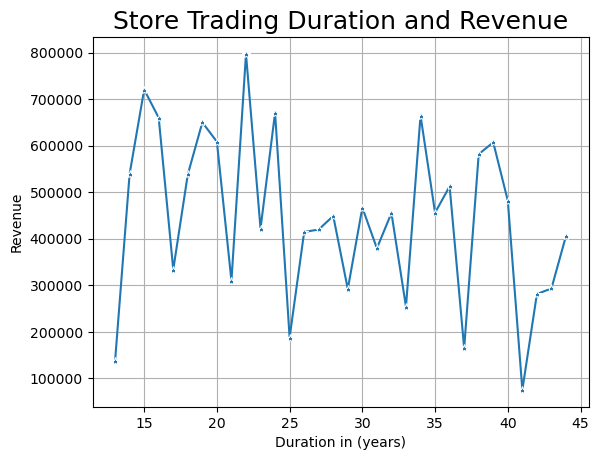

In [7]:
df_sorted = df.sort_values(by='YearOpened')

# Group by 'YearOpened' and calculate the total revenue
grouped_df = df_sorted.groupby('Duration', as_index=False)['Revenue'].sum()

# Create a bar plot using seaborn
sns.lineplot(x='Duration', y='Revenue', data=grouped_df, marker='*')
plt.xlabel('Duration in (years)')
plt.title('Store Trading Duration and Revenue', fontsize=18)
plt.grid(True)


NameError: name 'ticker' is not defined

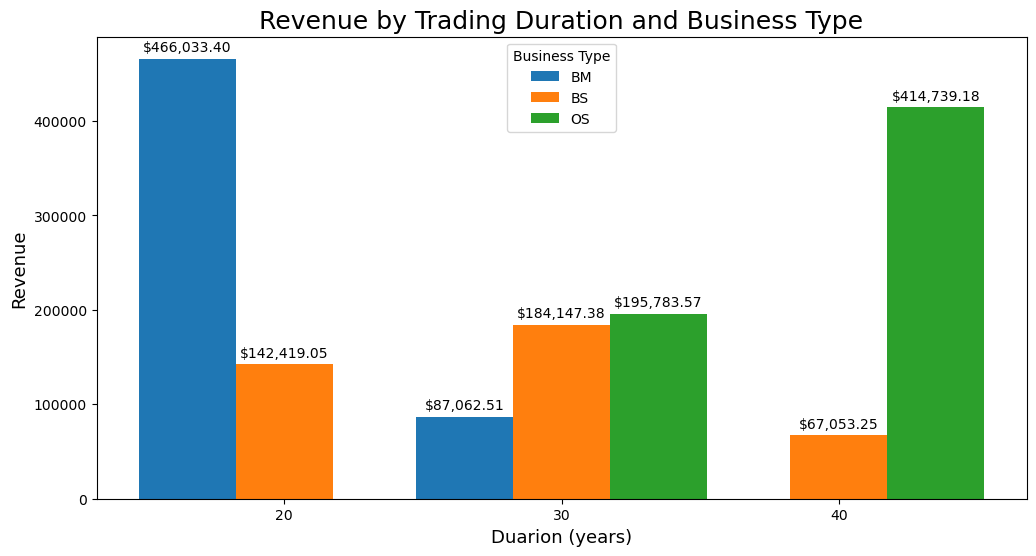

In [8]:
df['Duration'] = pd.Categorical(df['Duration'], categories=[10, 20, 30, 40], ordered=True)

# Pivot the table for easier plotting
pivot_df = df.pivot_table(index='Duration', columns='BusinessType', values='Revenue', aggfunc='mean')

# Plotting
labels = pivot_df.index
business_types = pivot_df.columns

# Define x locations and width of bars
x = np.arange(len(labels))
width = 0.35  

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting each business type
for i, business_type in enumerate(business_types):
    offset = (i - len(business_types) / 2) * width + width / 2
    rects = ax.bar(x + offset, pivot_df[business_type], width, label=business_type)
    ax.bar_label(rects, padding=3, fmt='${:,.2f}')

# Adding labeles  title, and custom x-axis tick labels
ax.set_ylabel('Revenue', fontsize=13)
ax.set_xlabel('Duarion (years)', fontsize=13)
ax.set_title('Revenue by Trading Duration and Business Type', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(title='Business Type')

# Formatting the y-axis as currency
formatter = ticker.FuncFormatter(lambda x, pos: '${:,.2f}'.format(x))
ax.yaxis.set_major_formatter(formatter)

fig.tight_layout()

plt.show()

In [ ]:
import scipy.stats as stats

# Assuming `df` is your DataFrame
# Pivot the data to have job titles as columns and sick leave hours as values
pivot_df = df.pivot(columns='Duration', values='Revenue')

# Perform ANOVA
anova_result = stats.f_oneway(*[pivot_df[col].dropna() for col in pivot_df])
print(f'ANOVA F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}')